In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
comments = pd.read_csv(r"/Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/UScomments.csv", error_bad_lines=False) 

/var/folders/1l/x4pysvdd0t79l7tspf06ht600000gn/T/ipykernel_42139/1299176275.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r"/Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/UScomments.csv", error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/var/folders/1l/x4pysvdd0t79l7tspf06ht600000gn/T/ipykernel_42139/1299176275.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r"/Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/UScomments.csv", error_bad_lines

In [10]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [13]:
comments.count()

video_id        691400
comment_text    691375
likes           691400
replies         691400
dtype: int64

In [123]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [ ]:
#Multiple ways that you can deal with na beside just droping them

In [1]:
# You can look at what kind of data you are dealing with if it's cetegorical/ numerical etc. 

In [2]:
# You can also look to see if the missing data is MCAR / MAR  / MNAR and from there you can decide how to deal with the na
# most of the time if the data is MCAR you can drop them (Litwise deletion) but if it's not MCAR you might be introducing
# some error to the analysis. In this case it's not that big of a deal to drop them 
# I think there are rules that said if the missing data is less than 25% you can drop them without issues or things like that

In [124]:
comments.dropna(inplace=True)

#### Perform Sentiment Analysis

In [125]:
from textblob import TextBlob

In [126]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [127]:
TextBlob("Logan Paul it's yo big day !! !! !!").sentiment.polarity

0.0

In [128]:
comments.shape

(691375, 4)

In [129]:
sample_df = comments[0:1000]
sample_df.shape

(1000, 4)

In [130]:
polarity = []

for comment in comments["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [131]:
len(polarity)

691375

In [132]:
comments['polarity'] = polarity

In [133]:
comments.head(100)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000
...,...,...,...,...,...
95,XpVt6Z1Gjjo,#1 trending whoaaaa,1,0,0.000
96,XpVt6Z1Gjjo,MY BOIIII IS #1 TRENDING LMAO,2,0,0.600
97,XpVt6Z1Gjjo,#1 on treading!!!,2,0,0.000
98,XpVt6Z1Gjjo,*eyyyjooooo Good morning loooganng WHATS POPPP...,2,0,0.875


#### WordCloud Analysis

In [134]:
filter1 = comments['polarity'] == 1 
comments_positive = comments[filter1]
comments_positive

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [135]:
filter2 = comments['polarity'] == -1
comments_negative = comments[filter2]
comments_negative

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [136]:
from wordcloud import WordCloud, STOPWORDS

In [137]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [138]:
type(comments['comment_text'])

pandas.core.series.Series

In [139]:
total_comments_positive = ' '.join(comments_positive['comment_text'])
total_comments_positive

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [140]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

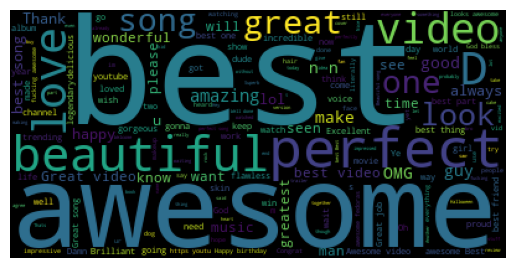

In [141]:
plt.imshow(wordcloud)
plt.axis('off')

In [142]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
total_comments_negative

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [143]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

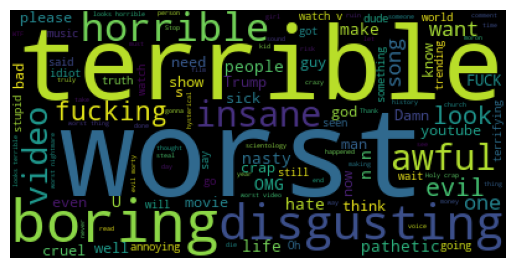

In [144]:
plt.imshow(wordcloud2)
plt.axis('off')

#### Emoji's Performance

In [145]:
#!pip install emoji==2.2.0

In [146]:
import emoji
emoji.__version__

'2.2.0'

In [147]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [148]:
comment = "trending 😉"

In [149]:
[char for char in comment if char in emoji.EMOJI_DATA]

# emoji_list = []
# for char in comment:
#     if char in emoji.EMOJI_DATA:
#         emoji_list.append(char)

['😉']

In [150]:
all_emojis_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [151]:
all_emojis_list[1:20]

['‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻']

In [152]:
from collections import Counter

In [153]:
dict_counter = Counter(all_emojis_list).most_common(10)
dict_counter

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [154]:
dict_counter[0][0]

'😂'

In [155]:
top_ten_emoji = [dict_counter[i][0] for i in range(10)]
top_ten_emoji

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [156]:
top_ten_freqs = [dict_counter[i][1] for i in range(10)]
top_ten_freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [157]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [158]:
trace = go.Bar(x=top_ten_emoji, y = top_ten_freqs)

In [159]:
iplot([trace])

#### Collect Entire Data of Youtube. 

In [160]:
import os

In [161]:
additional_files = os.listdir(r'/Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/additional_data')
additional_files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [162]:
csv_files = [file for file  in additional_files if '.csv' in file]
csv_files

# csv_files = []
# for file in additional_files: 
#     if '.csv' in file:
#         csv_files.append(file)
        
# csv_files

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [163]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [164]:
full_dataframe = pd.DataFrame()
path = r'/Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/additional_data'

for file in csv_files:
    current_dataframe = pd.read_csv(path+'/'+file , encoding='iso-8859-1', error_bad_lines=False)
    full_dataframe = pd.concat([full_dataframe, current_dataframe], ignore_index=True)

In [165]:
full_dataframe.shape # this is the raw data of all data combined

(375942, 16)

#### How to export your data into (csv, json, db)

In [166]:
full_dataframe[full_dataframe.duplicated()].shape

(36417, 16)

In [167]:
full_dataframe = full_dataframe.drop_duplicates()

In [168]:
full_dataframe.shape

(339525, 16)

In [169]:
full_dataframe[0:1000].to_csv(r'/Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/export data/youtube_sample.csv', index = False)

In [170]:
full_dataframe[0:1000].to_json(r'/Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/export data/youtube_sample.json')

In [171]:
from sqlalchemy import create_engine

In [172]:
engine = create_engine(r'sqlite:////Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/export data/youtube_sample.sqlite')

In [173]:
## Excute only one time
## full_dataframe[0:1000].to_sql("Users", con=engine, if_exists='append') 

#### Which Category has the maximum likes?

In [174]:
full_dataframe.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [175]:
full_dataframe['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [176]:
json_dataframe = pd.read_json(r'/Users/aska/Desktop/Data_Analyst_Projects/Youtube Case Study/additional_data/US_category_id.json')
json_dataframe

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [177]:
json_dataframe['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [178]:
json_dataframe['items'][2]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
 'id': '10',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Music',
  'assignable': True}}

In [179]:
category_dictionary = {}
for item in json_dataframe['items'].values:
    category_dictionary[int(item['id'])] = item['snippet']['title'] # dict[key] = value
category_dictionary

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [180]:
full_dataframe['category_name'] =  full_dataframe['category_id'].map(category_dictionary)

In [181]:
full_dataframe.head(100)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,nC0TkydzQM4,17.14.11,Â¿QuÃ© tan Buena es COCO? - Platica con Spoile...,Caja de Peliculas,24,2017-11-13T17:00:29.000Z,"coco|""coco pixar""|""coco disney""|""coco recuerda...",22189,2087,134,384,https://i.ytimg.com/vi/nC0TkydzQM4/default.jpg,False,False,False,CONTACTO:\nhector_portillo_17@hotmail.com\n\nR...,Entertainment
96,LTiiX8hq4Sw,17.14.11,Crema tonificante para el cuerpo,hanan beauty,26,2017-11-13T17:05:07.000Z,[none],18212,1781,42,252,https://i.ytimg.com/vi/LTiiX8hq4Sw/default.jpg,False,False,False,"Si te ha gustado el vÃ­deo compÃ¡rtelo, dale a...",Howto & Style
97,_GaoLGcZ8Wg,17.14.11,POR FIN!! DOS FICHAJES BOMBA PARA EL CRUZ AZUL...,Lord Fer LEE,17,2017-11-12T23:10:35.000Z,"CRUZ AZUL|""MAQUINA CELESTE""|""CEMENTEROS""|""PACO...",49349,41,55,11,https://i.ytimg.com/vi/_GaoLGcZ8Wg/default.jpg,False,False,False,CRUZ AZUL YA TIENE DOS REFUERZOS PARA EL CLAUS...,Sports
98,2-p6XmtKCVY,17.14.11,SANTA EUCARISTIA 13 NOVIEMBRE 2017 Misa del DÃ...,SoyCatolico,10,2017-11-13T05:07:53.000Z,"lecturas misa LUNES 13 NOVIEMBRE de 2017|""Euca...",11140,247,12,12,https://i.ytimg.com/vi/2-p6XmtKCVY/default.jpg,False,False,False,Suscribete y podrÃ¡s disfrutar del mejor conte...,Music


In [182]:
full_dataframe.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               17977
category_name                 0
dtype: int64

In [ ]:
# There are lot of problems witht this graph. there are lot of outliers in the data as displays in the chart 
# the graph is pretty hard to read and it doesn't tell me much besides there are lot of outliers beside that everything
# is hard to read
# a bar chart might be more appropriate or other kind of grpahs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

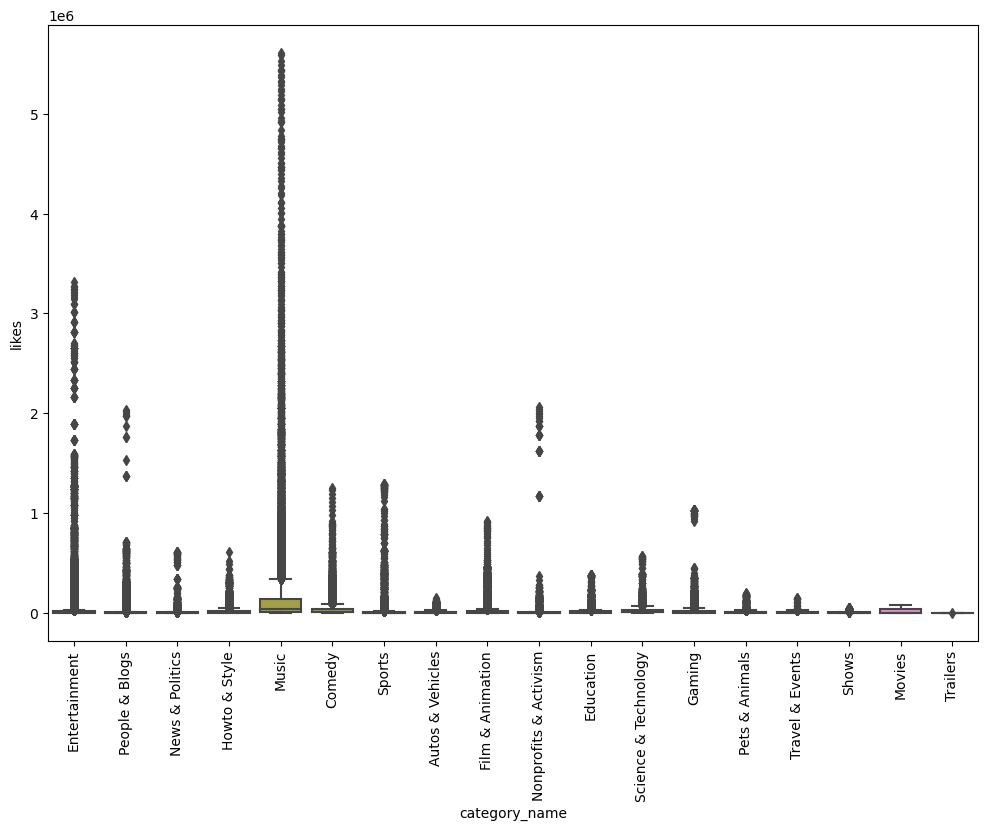

In [183]:
plt.figure(figsize=(12, 8))
sns.boxplot(data= full_dataframe, x='category_name', y="likes")
plt.xticks(rotation="vertical")

In [184]:
full_dataframe.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

#### Find out if audience is enguaged or not

In [185]:
full_dataframe['likes_rate'] = (full_dataframe["likes"]/full_dataframe['views'])*100
full_dataframe['dislikes_rate'] = (full_dataframe["dislikes"]/full_dataframe['views'])*100
full_dataframe['comment_count_rate'] = (full_dataframe["comment_count"]/full_dataframe['views'])*100

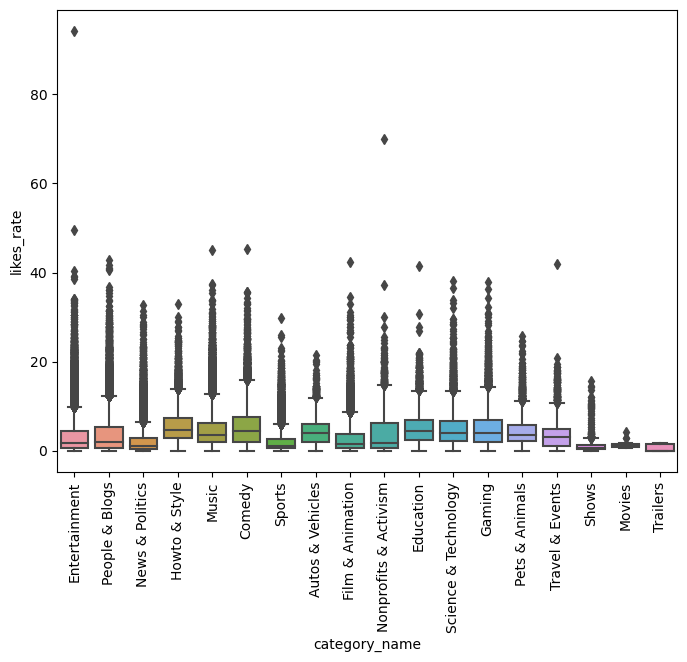

In [186]:
plt.figure(figsize=(8, 6))
sns.boxplot(data= full_dataframe, x='category_name', y="likes_rate")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
# a summary of the data would be helpful for this 
# the graph is also pretty hard to comprehend why are the views only go to 4? and like to 7?

<AxesSubplot:xlabel='views', ylabel='likes'>

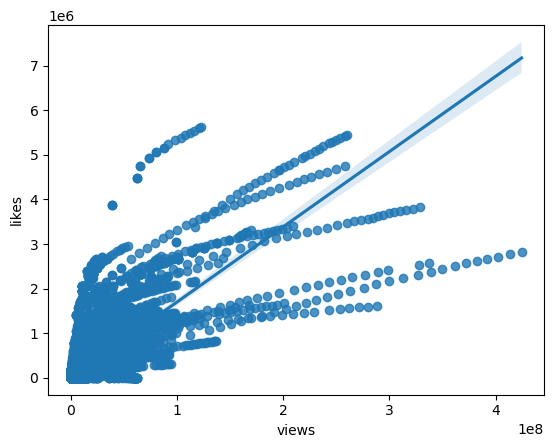

In [187]:
sns.regplot(x="views", y = "likes", data=full_dataframe)

In [188]:
full_dataframe[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<AxesSubplot:>

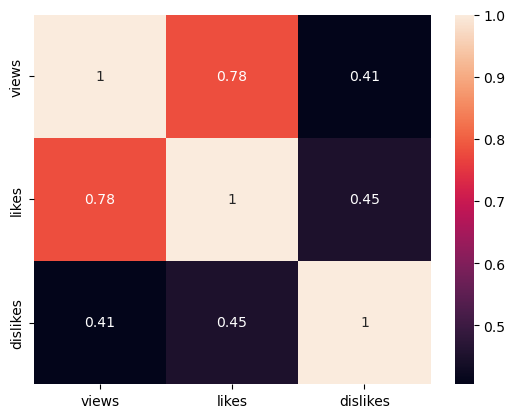

In [189]:
sns.heatmap(full_dataframe[['views', 'likes', 'dislikes']].corr(), annot=True)

#### Which channels have the largest number of treading videos?

In [190]:
full_dataframe.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,likes_rate,dislikes_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704
5,Q9kK6NWZR1U,17.14.11,Asi se sintio Terremoto en iraq al bordo de ir...,MÃSICA & ENTRETENIMIENTO,10,2017-11-12T20:17:38.000Z,[none],129645,506,67,239,https://i.ytimg.com/vi/Q9kK6NWZR1U/default.jpg,False,False,False,Un fuerte sismo ha afectado en la noche de est...,Music,0.390297,0.051680,0.184350


In [191]:
full_dataframe['channel_title'].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: channel_title, Length: 37824, dtype: int64

In [192]:
cfd = full_dataframe.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [193]:
cfd = cfd.rename(columns = {0:'total_videos'})

In [194]:
cfd

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [195]:
import plotly.express as px

In [196]:
px.bar(data_frame=cfd[0:20], x='channel_title', y = 'total_videos')

In [216]:
full_dataframe['title']

0                            CapÃ­tulo 12 | MasterChef 2017
1         ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2                  LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA
3          Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017
4                  DOG HACKS | MUSAS LESSLIE LOS POLINESIOS
                                ...                        
375937    Enrique Iglesias - MOVE TO MIAMI (Official Vid...
375938    Jacob Sartorius - Up With It (Official Music V...
375939                   Anne-Marie - 2002 [Official Video]
375940    Eleni Foureira - Fuego - Cyprus - LIVE - First...
375941    KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...
Name: title, Length: 339525, dtype: object

#### Does Punctuations in title and tags have any relation with views, likes and dislikes comments?

In [212]:
import string

In [213]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [214]:
len([char for char in full_dataframe['title'][0] if char in string.punctuation])

1

In [217]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [218]:
sample = full_dataframe[0:10000]

In [220]:
sample['count_punc'] = full_dataframe['title'].apply(punc_count)
sample['count_punc']

0       1
1       3
2       1
3       1
4       1
       ..
9995    2
9996    3
9997    1
9998    1
9999    0
Name: count_punc, Length: 10000, dtype: int64

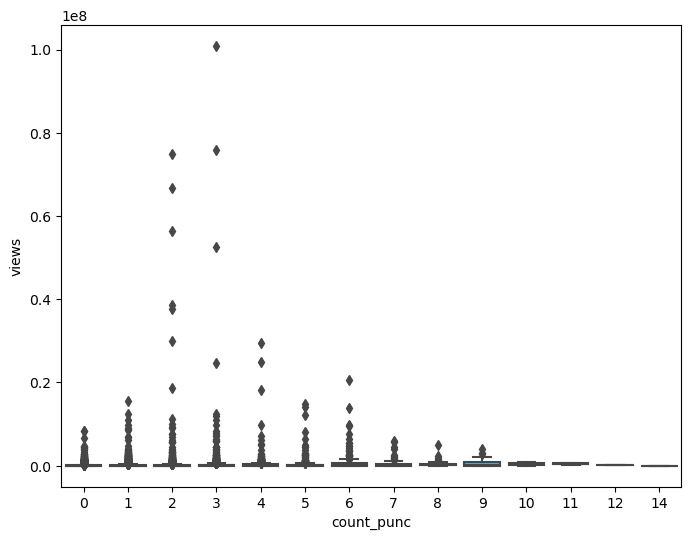

In [222]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='count_punc', y ='views', data=sample)
plt.show()

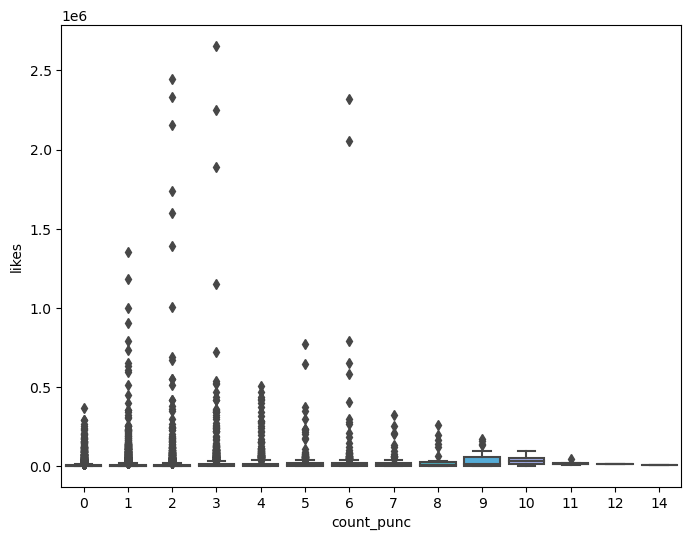

In [223]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='count_punc', y ='likes', data=sample)
plt.show()